In [1]:
import pandas as pd
import urllib
from urllib import request
import featuretools as ft
import numpy as np
import os
dataLoc="data/cleandata.csv"
data = pd.read_csv(dataLoc)
data.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,delinq_2yrs,open_acc,total_acc,initial_list_status,out_prncp,total_pymnt,total_pymnt_inv,application_type,acc_now_delinq
0,0,5000.0,36,10.65,162.87,B,B2,10,RENT,24000,...,27.65,0.0,3.0,9.0,f,0.0,5861.071414,5831.78,INDIVIDUAL,0.0
1,1,2500.0,60,15.27,59.83,C,C4,1,RENT,30000,...,1.00,0.0,3.0,4.0,f,0.0,1008.710000,1008.71,INDIVIDUAL,0.0
2,2,2400.0,36,15.96,84.33,C,C5,10,RENT,12252,...,8.72,0.0,2.0,10.0,f,0.0,3003.653644,3003.65,INDIVIDUAL,0.0
3,3,10000.0,36,13.49,339.31,C,C1,10,RENT,49200,...,20.00,0.0,10.0,37.0,f,0.0,12226.302212,12226.30,INDIVIDUAL,0.0
4,4,3000.0,60,12.69,67.79,B,B5,1,RENT,80000,...,17.94,0.0,15.0,38.0,f,766.9,3242.170000,3242.17,INDIVIDUAL,0.0


In [2]:
data['grade'] = data['grade'].map({'A': 1, 'B': 2,'C': 3, 'D': 4,'E': 5, 'F': 6, 'G': 7})


2019-03-20 11:55:57,324 featuretools.entityset - WARNING    index id not found in dataframe, creating new integer column


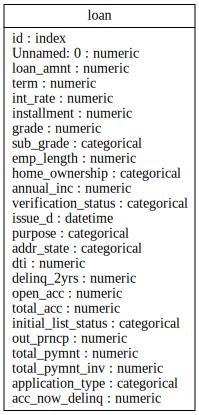

In [3]:
entities={"loan":(data,"id")}
es=ft.EntitySet("my-entity-set", entities)
es.plot()

In [4]:
es["loan"].variables


[<Variable: id (dtype = index)>,
 <Variable: Unnamed: 0 (dtype = numeric)>,
 <Variable: loan_amnt (dtype = numeric)>,
 <Variable: term (dtype = numeric)>,
 <Variable: int_rate (dtype = numeric)>,
 <Variable: installment (dtype = numeric)>,
 <Variable: grade (dtype = numeric)>,
 <Variable: sub_grade (dtype = categorical)>,
 <Variable: emp_length (dtype = numeric)>,
 <Variable: home_ownership (dtype = categorical)>,
 <Variable: annual_inc (dtype = numeric)>,
 <Variable: verification_status (dtype = categorical)>,
 <Variable: issue_d (dtype: datetime, format: None)>,
 <Variable: purpose (dtype = categorical)>,
 <Variable: addr_state (dtype = categorical)>,
 <Variable: dti (dtype = numeric)>,
 <Variable: delinq_2yrs (dtype = numeric)>,
 <Variable: open_acc (dtype = numeric)>,
 <Variable: total_acc (dtype = numeric)>,
 <Variable: initial_list_status (dtype = categorical)>,
 <Variable: out_prncp (dtype = numeric)>,
 <Variable: total_pymnt (dtype = numeric)>,
 <Variable: total_pymnt_inv (dtyp

In [5]:
es = es.entity_from_dataframe(entity_id="loan", 
                              dataframe=data, 
                              index="id", 
                               
                              variable_types={"application_type": ft.variable_types.Categorical})

es = es.normalize_entity(base_entity_id="loan",
        new_entity_id="interest",
        index="id",
        additional_variables=[ "loan_amnt","term","int_rate","emp_length","grade", "total_pymnt","total_pymnt_inv"])






es["interest"].variables


[<Variable: id (dtype = index)>,
 <Variable: loan_amnt (dtype = numeric)>,
 <Variable: term (dtype = numeric)>,
 <Variable: int_rate (dtype = numeric)>,
 <Variable: emp_length (dtype = numeric)>,
 <Variable: grade (dtype = numeric)>,
 <Variable: total_pymnt (dtype = numeric)>,
 <Variable: total_pymnt_inv (dtype = numeric)>]

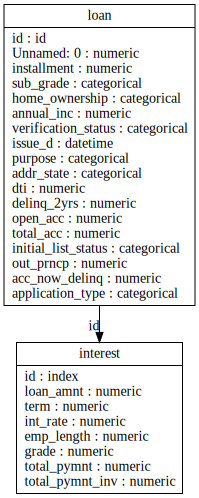

In [6]:
es.plot()

In [7]:
es

Entityset: my-entity-set
  Entities:
    loan [Rows: 887350, Columns: 18]
    interest [Rows: 887350, Columns: 8]
  Relationships:
    loan.id -> interest.id

In [8]:
es["interest"]


Entity: interest
  Variables:
    id (dtype: index)
    loan_amnt (dtype: numeric)
    term (dtype: numeric)
    int_rate (dtype: numeric)
    emp_length (dtype: numeric)
    grade (dtype: numeric)
    total_pymnt (dtype: numeric)
    total_pymnt_inv (dtype: numeric)
  Shape:
    (Rows: 887350, Columns: 8)

In [9]:
new_relationship = ft.Relationship(es["interest"]["id"],
                                     es["loan"]["id"])

In [ ]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                          target_entity="interest")

In [ ]:
feature_matrix